# Longitud media umbral

## Description
Si representamos $L_g$ frente a $L_p$, para las **6521** especies de las que tenemos datos de genes y proteínas cruzadas (Figura 6), vemos que hasta un valor umbral 
$L_g = L_c$, la longitud media de los genes es 3 veces más grande que la de las proteínas y si representamos las varianzas ($\sigma^2$) hasta un valor $\sigma^2_g=\sigma^2_c$, la varianza de los genes es 9 veces mayor. Las distribuciones están simplemente escaladas.

### Modules

In [1]:
import os
import pandas as pd
#import plotnine as p9
from plotnine import *
import matplotlib.pyplot as plt

## Observations: Statistical description of gene (and protein) length distributions in different species
### Retrieve the statistical description of the distributions


In [2]:
# data file
system = list(os.uname())[0]
if system == 'Linux':
    merged_6521_file = "/media/emuro/Wes/"
elif system == 'Darwin':
    pass # Fix this!
merged_6521_file = merged_6521_file + "results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/"
merged_6521_file = merged_6521_file + "stat_description.taxid_merged.ensembl_and_ref_proteome.tsv"
print(merged_6521_file)

# retrieve data
merged = pd.read_csv(merged_6521_file, sep="\t")
merged.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)
 
# visualize data
print(merged.shape)
pd.set_option('display.max_columns', None)
if 1:
    display(merged.head(1))
    print("\nClades:\n", merged["Clades"].value_counts(), sep="")


/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/stat_description.taxid_merged.ensembl_and_ref_proteome.tsv
(6521, 66)


,genes_species,genes_assembly,genes_trunk_genes_path,genes_genes_file,genes_count,genes_mean,genes_std,genes_var,genes_min,genes_25perc,genes_50perc,genes_75perc,genes_max,genes_log10_mean,genes_log10_std,genes_log10_var,genes_log10_min,genes_log10_25perc,genes_log10_50perc,genes_log10_75perc,genes_log10_max,genes_log_mean,genes_log_std,genes_log_var,genes_log_min,genes_log_25perc,genes_log_50perc,genes_log_75perc,genes_log_max,genes_division,tax_id,prots_species,prots_proteome_id,prots_superregnum,prots_num_prot_cod_genes,prots_uniprot_fasta_file,prots_count,prots_mean,prots_std,prots_var,prots_min,prots_25perc,prots_50perc,prots_75perc,prots_max,prots_log10_mean,prots_log10_std,prots_log10_var,prots_log10_min,prots_log10_25perc,prots_log10_50perc,prots_log10_75perc,prots_log10_max,prots_log_mean,prots_log_std,prots_log_var,prots_log_min,prots_log_25perc,prots_log_50perc,prots_log_75perc,prots_log_max,Clades,ratio_mean_prots_genes,diff_prots_genes,abs_diff,ratio_prots_genes
0,archangium_gephyra_gca_001027285,ASM102728v1,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.archangium_gephyra_gca_00...,10119.0,1103.871035,1127.066255,1.270278e+06,113.0,524.0,887.0,1388.0,36653.0,2.919254,0.333869,0.111468,2.053078,2.719331,2.947924,3.142389,4.56411,6.721831,0.768762,0.590995,4.727388,6.261492,6.787845,7.235619,10.509251,bacteria,48,Archangium gephyra,UP000035579,bacteria,10110,/ftp.uniprot.org/pub/databases/uniprot/current...,10110.0,367.499703,375.772244,141204.779058,37.0,174.0,295.0,462.0,12217.0,2.441094,0.334836,0.112115,1.568202,2.240549,2.469822,2.664642,4.086965,5.620827,0.770987,0.594422,3.610918,5.159055,5.686975,6.135565,9.410584,bacteria,0.998757,-9.0,9.0,0.999111



Clades:
bacteria       5468
fungi           533
archaea         227
vertebrates      94
protist          91
plants           59
metazoa          49
Name: Clades, dtype: int64


#### Filter columns and clades

In [3]:
# Filter columns
merged = merged[["genes_species", "Clades", "tax_id", "genes_mean", "prots_mean"] + ["genes_var", "prots_var"]]

# Captura una referencia    
if 1: # tb. podría capturar varias
    captured = merged[(merged["genes_mean"]<=1506) & (merged["genes_mean"]>=1497)]
    captured = captured[(captured["prots_mean"]<=502) & (captured["prots_mean"]>=499)]
    captured = captured.sort_values(by='genes_mean')
    captured_species = "kazachstania_naganishii_cbs_8797_gca_000348985"
print("capture a reference:", captured.shape)
display(captured)

# Filter some clades if you want it
if 1:
    pass
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "archaea", "protist"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["fungi", "metazoa", "vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["protist", "plants"])]
elif 1:
    merged = merged.loc[merged["Clades"].isin(["vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "protist"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "fungi"])] 
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "plants"])] 
elif 0:
    merged = merged.loc[merged["Clades"].isin(["bacteria", "vertebrates"])] 
#     kazachstania_naganishii_cbs_8797_gca_000348985
print(merged.shape)
display(merged)

capture a reference: (1, 7)


,genes_species,Clades,tax_id,genes_mean,prots_mean,genes_var,prots_var
3043,kazachstania_naganishii_cbs_8797_gca_000348985,fungi,1071383,1503.940237,499.711187,1.203042e+06,134805.486571


(6521, 7)


,genes_species,Clades,tax_id,genes_mean,prots_mean,genes_var,prots_var
0,archangium_gephyra_gca_001027285,bacteria,48,1103.871035,367.499703,1.270278e+06,141204.779058
1,chondromyces_crocatus_gca_001189295,bacteria,52,1211.514450,403.466555,1.105460e+06,122906.027917
2,nannocystis_exedens_gca_900112715,bacteria,54,1078.663863,358.985125,6.671474e+05,74145.723034
3,lysobacter_enzymogenes_gca_001442515,bacteria,69,955.797070,318.117519,1.206769e+06,134350.408099
4,stella_humosa_gca_003751345,bacteria,94,998.770749,332.257470,3.667197e+05,40746.238069
...,...,...,...,...,...,...,...
6516,rhodobacteraceae_bacterium_sh_1_gca_003008555,bacteria,2605946,958.938653,318.607411,3.693746e+05,41108.419840
6517,isoptericola_sp_pw21_gca_003244315,bacteria,2607479,998.542149,332.182111,4.889844e+05,54333.535541
6518,rhodospirillaceae_bacterium_gca_003344765,bacteria,2661937,961.226040,319.827559,5.610666e+05,62361.695366
6519,glaciihabitans_sp_rp_3_7_gca_004310685,bacteria,2668039,989.170912,329.057641,6.527328e+05,72525.912868


In [4]:
# Function to plot the distribution
# blue: Observation
##########################################
def plot_distribution (dist, title, subtitle, xlabel, ylabel, bool_mean, hist_num_boxes): 
    count, bins, *rest = plt.hist(dist, hist_num_boxes, density=True, alpha=0.4, edgecolor='black')
    N = len(dist)

    mu = dist.mean()
    #plt.vlines(x = mu, ymin = 0, ymax = 0.005, colors = 'white', label = 'mean') # mean
    #plt.vlines(x = mu, colors = 'white', label = 'mean') # mean
    if bool_mean:
        plt.xlim([100,700]); plt.ylim([0,0.02])
        plt.vlines(x = mu, ymin = 0, ymax = 0.005, colors = 'green', label = 'mean') # mean
    else:
        plt.xlim([10**4, 1*10**6]); #plt.ylim([0,0.02])
        plt.vlines(x = mu, ymin = 0, ymax = 1/10**5, colors = 'green', label = 'mean') # mean
            
    plt.suptitle(title); plt.title( "mean=" + str(mu) + "; " + "N=" + str(int(N)) + "; " + "boxes=" + str(int(hist_num_boxes)) )
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.show()

## $\mu_p$

plants


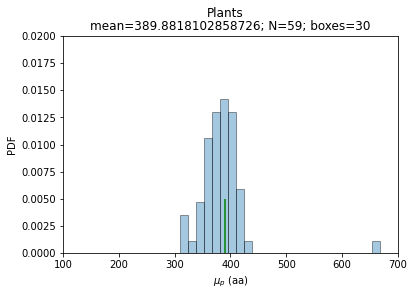

metazoa


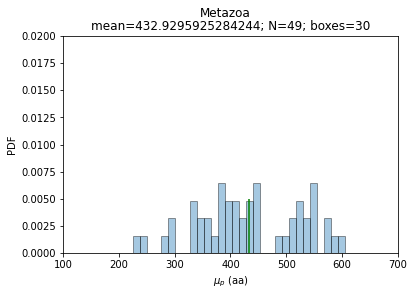

vertebrates


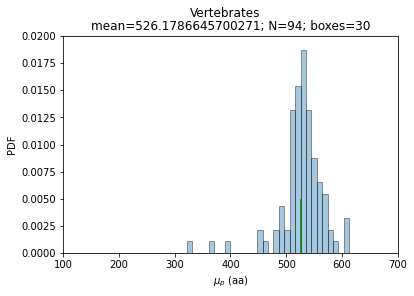

fungi


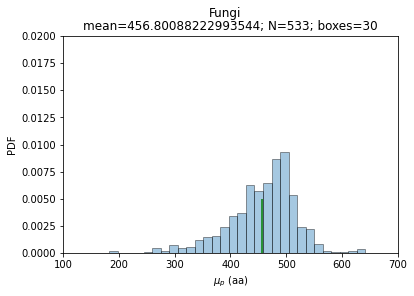

protist


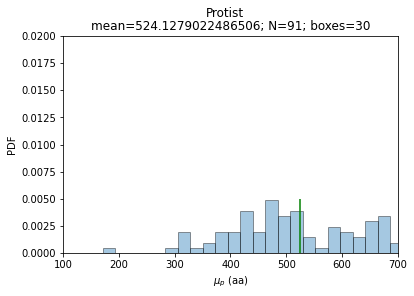

In [5]:
if 1:
    aux_df = merged.copy()
    legends_by = "Clades"
    if 0:
        print(aux_df[legends_by].unique().tolist())
        print("\nClades:\n", aux_df[legends_by].value_counts(), sep="")
    clades_to_see = ["plants", "metazoa", "vertebrates", "fungi", "protist"]
    for clade in clades_to_see: # for each division
        df2plot = aux_df[aux_df[legends_by]==clade] 
        print(clade)
        
        dist = df2plot.prots_mean
        #
        title = clade.capitalize()
        subtitle = ""
        x_lab = "$\mu_p$ (aa)"
        y_lab = "PDF"
        bool_mean = True
        hist_num_boxes = 30
        
        plot_distribution (dist, title, subtitle, x_lab, y_lab, bool_mean, hist_num_boxes)
        # Note: it give a error...do not worry

<!--
#### Calculate Taylor variance
As reference
For some lengths 
(Lg, Vg): (1500, )  
(Lp, Vp): (500, )
--> 

## $\sigma^2_p$

['bacteria', 'archaea', 'plants', 'protist', 'fungi', 'metazoa', 'vertebrates']

Clades:
bacteria       5468
fungi           533
archaea         227
vertebrates      94
protist          91
plants           59
metazoa          49
Name: Clades, dtype: int64
plants


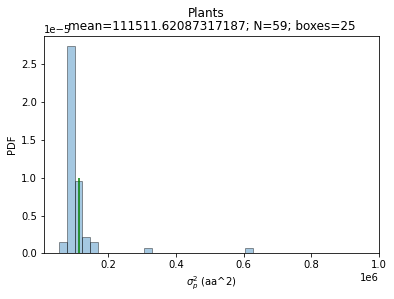

metazoa


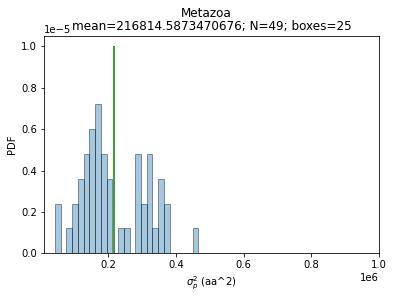

vertebrates


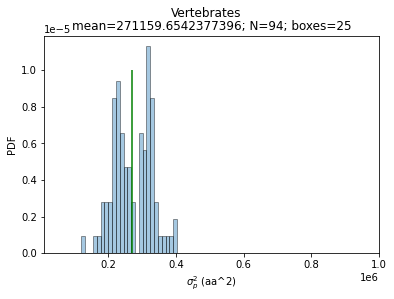

fungi


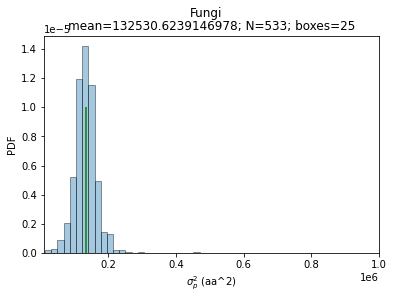

protist


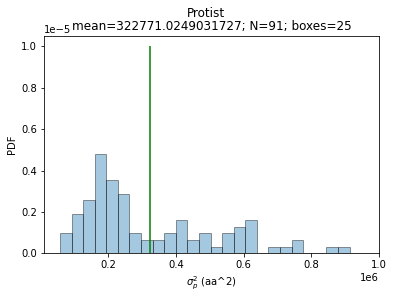

In [9]:
if 1:
    aux_df = merged.copy()
    legends_by = "Clades"
    if 1:
        print(aux_df[legends_by].unique().tolist())
        print("\nClades:\n", aux_df[legends_by].value_counts(), sep="")
    clades_to_see = ["plants", "metazoa", "vertebrates", "fungi", "protist"]
    for clade in clades_to_see: # for each division
        df2plot = aux_df[aux_df[legends_by]==clade] 
        print(clade)
        
        dist = df2plot.prots_var
        #
        title = clade.capitalize()
        subtitle = ""
        x_lab = "$\sigma^2_p$ (aa^2)"
        y_lab = "PDF"
        bool_mean = False
        hist_num_boxes = 25
        
        plot_distribution (dist, title, subtitle, x_lab, y_lab, bool_mean, hist_num_boxes)

## Fluctuacion en $\mu_p$ de las diferentes ramas evolutivas

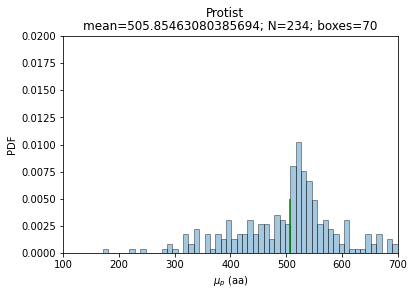

In [13]:
if 1:
    aux_df = merged.copy()
    legends_by = "Clades"
    if 0:
        print(aux_df[legends_by].unique().tolist())
        print("\nClades:\n", aux_df[legends_by].value_counts(), sep="")
    #clades_to_see = ["plants", "metazoa", "vertebrates", "fungi", "protist"]
    if 1:
        clades_to_see = ["metazoa", "vertebrates", "protist"]
    elif 0:
        clades_to_see = ["plants", "protist"]
    elif 0:
        clades_to_see = ["fungi", "protist"]
        
    df2plot = aux_df[aux_df[legends_by].isin(clades_to_see)]   #df2plot = df2plot[ ~df2plot["division_8"].isin(["fungi", "metazoa", "vertebrates"])]  
        
    dist = df2plot.prots_mean
    #
    title = clade.capitalize()
    subtitle = ""
    x_lab = "$\mu_p$ (aa)"
    y_lab = "PDF"
    bool_mean = True
    hist_num_boxes = 70
        
    plot_distribution (dist, title, subtitle, x_lab, y_lab, bool_mean, hist_num_boxes)
    # Note: it give a error...do not worry